<a href="https://colab.research.google.com/github/zaedulislam/ConU_INSE_6220-Advanced_Statistical_Approaches_to_Quality/blob/main/Tutorial%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python Modules

In [6]:
import numpy as np

# Open source data analysis and manipulation library for Python
import pandas as pd

# matplotlib - The Python library is needed to plot nice charts
import matplotlib.pyplot as plt

# 'seaborn' - a matplotlib based statistical graphical library
import seaborn as sns; 
sns.set() # Use seaborn plotting style defaults


from sklearn.decomposition import PCA

from google.colab import files

# Download as a CSV File

In [7]:
data = np.array([
                [1360.00, 150, 1045.50, 1056.25, 1692.00], 
                [1292.25, 112, 954.75, 1173.75, 1558.75],
                [1402.00, 88, 939.25, 1140.00, 1554.50],
                [1375.50, 80, 948.25, 1092.00, 1583.75],
                [1272.25, 51, 835.50, 1205.00, 1490.00]
                 ])

dataset = pd.DataFrame(data, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
print(dataset)

        X1     X2       X3       X4       X5
0  1360.00  150.0  1045.50  1056.25  1692.00
1  1292.25  112.0   954.75  1173.75  1558.75
2  1402.00   88.0   939.25  1140.00  1554.50
3  1375.50   80.0   948.25  1092.00  1583.75
4  1272.25   51.0   835.50  1205.00  1490.00


In [8]:
dataset.to_csv('airquality.csv')
files.download('airquality.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Upload Files into Colaboratory

In [11]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving airquality.csv to airquality.csv
User uploaded file "airquality.csv" with length 198 bytes


In [12]:
# Read CSV file into dataframe
df = pd.read_csv('airquality.csv', index_col=0)

##!pip install xlrd
##df = pd.read_excel('airquality.xls')
print(df.head())

        X1     X2       X3       X4       X5
0  1360.00  150.0  1045.50  1056.25  1692.00
1  1292.25  112.0   954.75  1173.75  1558.75
2  1402.00   88.0   939.25  1140.00  1554.50
3  1375.50   80.0   948.25  1092.00  1583.75
4  1272.25   51.0   835.50  1205.00  1490.00


In [ ]:
# m,n=df.shape #size of data
#X = df.ix[:,0:n].values # Feature matrix
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X) #normalize data

# Normalize data

In [13]:
# The data can be normalized by subtracting the mean (µ) of each feature and a division by the standard deviation (σ).
df = (df - df.mean()) / df.std()

print(df)

         X1        X2        X3        X4        X5
0  0.352402  1.448667  1.352851 -1.282971  1.578665
1 -0.865722  0.425445  0.135486  0.671003 -0.231637
2  1.107549 -0.220801 -0.072438  0.109755 -0.289377
3  0.631087 -0.436216  0.048292 -0.688464  0.108007
4 -1.225316 -1.217096 -1.464192  1.190677 -1.165658


In [15]:
# Displaying DataFrame columns
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')

In [16]:
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      5 non-null      float64
 1   X2      5 non-null      float64
 2   X3      5 non-null      float64
 3   X4      5 non-null      float64
 4   X5      5 non-null      float64
dtypes: float64(5)
memory usage: 240.0 bytes


# Observations and variables

In [22]:
observations = list(df.index)
print(observations)

[0, 1, 2, 3, 4]


In [20]:
variables = list(df.columns)
print(variables)

['X1', 'X2', 'X3', 'X4', 'X5']


# Data Visualisation

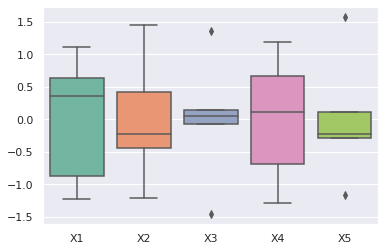

In [23]:
sns.boxplot(data=df, orient="v", palette="Set2")

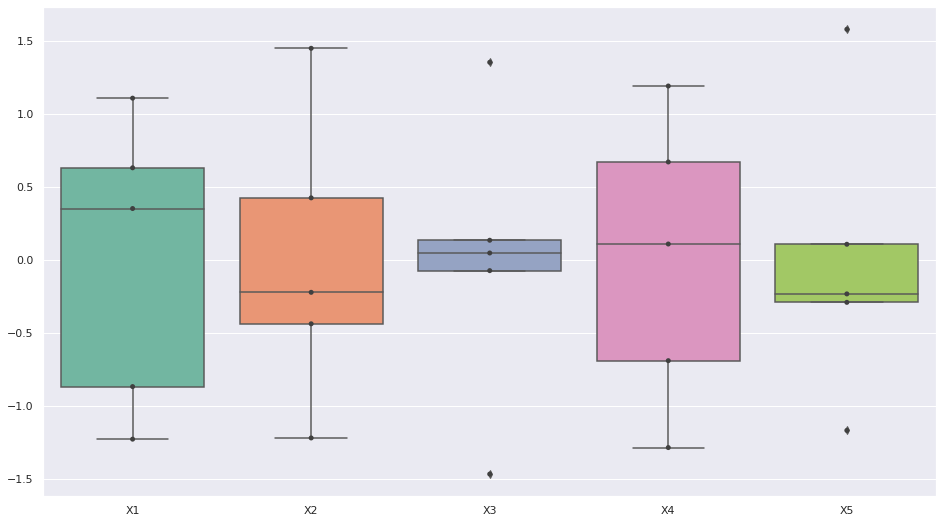

In [25]:
# Use swarmplot() to show the datapoints on top of the boxes:

plt.figure(figsize=(16, 9))   
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.swarmplot(data=df, color=".25") 

## Pair plot

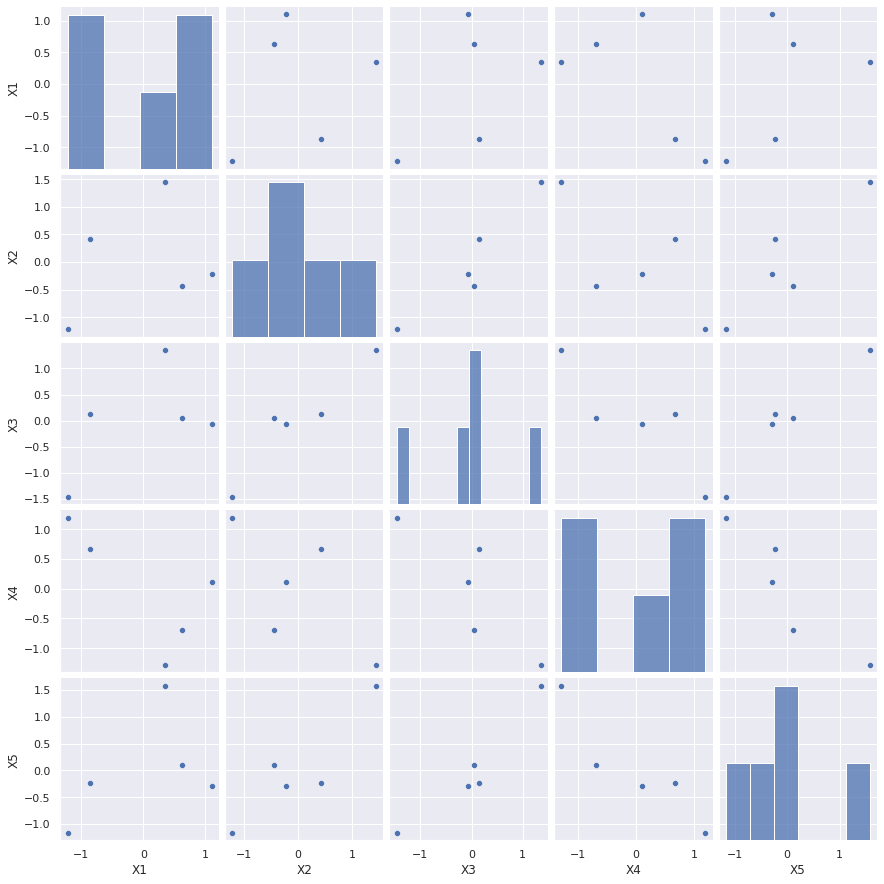

In [26]:
sns.pairplot(df)

# Covariance

Text(0.5, 1.0, 'Covariance matrix')

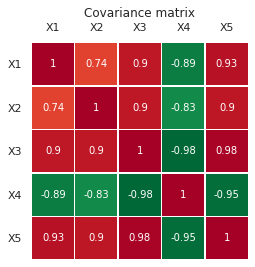

In [ ]:
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Covariance matrix')

**Principal component analysis**

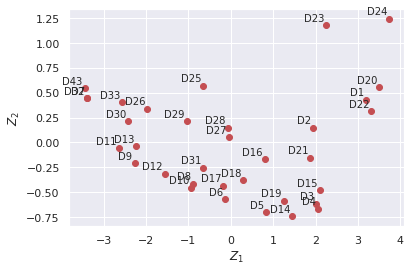

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

**Eigenvectors**

In [ ]:
X = np.array([23, 4, 29, 44, 47, 24, 40, 23, 23, 44, 33, 27, 60, 46, 61, 11, 23, 62, 31, 44, 77, 14, 65, 42])
#X = np.array([99, 85, 86, 71, 82, 95, 108, 87, 89, 89, 78, 86])
#X = np.array([12, 12, 12, 14, 15, 16, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 20, 
#              20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 23, 23, 24, 24, 25, 26, 26, 28, 28, 28])			  
#X = np.random.poisson(35, 15)

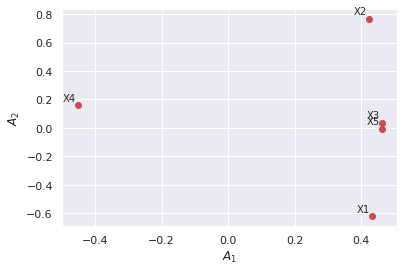

In [ ]:
A = pca.components_.T 
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


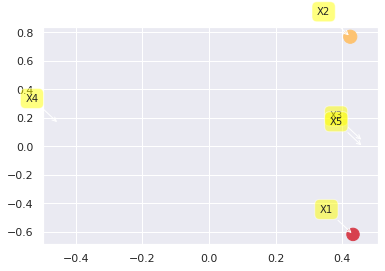

In [ ]:
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

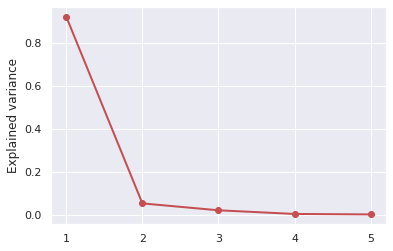

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explaiend Variance**

Text(0, 0.5, 'Cumulative explained variance')

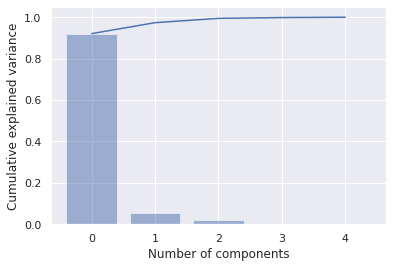

In [ ]:
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

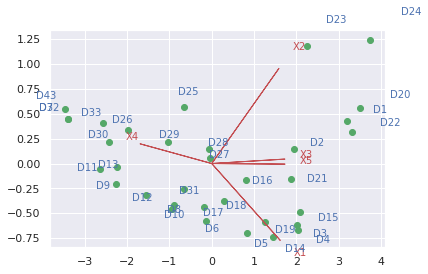

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Principal components**

Text(0.5, 1.0, 'Principal components')

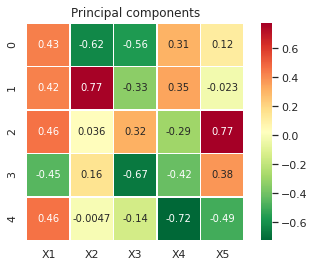

In [ ]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')